In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [25]:
df = pd.read_csv('weatherHistory.csv')        

In [26]:
df.shape

(96453, 12)

This dataset contain 96453 rows and 9 columns.

In [27]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [29]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [30]:
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [31]:
df.tail(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


removing Formatted Date, Daily Summary & Loud Cover columns.

In [32]:
df.drop(columns = ['Formatted Date', 'Daily Summary', 'Loud Cover'], axis = 1, inplace = True)
df.head(5)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [33]:
df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [34]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [35]:
df['Precip Type'].fillna('rain', inplace = True)

In [36]:
df['Precip Type'].value_counts()

rain    85741
snow    10712
Name: Precip Type, dtype: int64

In [37]:
df.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [38]:
df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

Label Encoding.

In [39]:
le = LabelEncoder()
df['EnSummary'] = le.fit_transform(df['Summary'])
df.head(5)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),EnSummary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,19
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,19
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,17
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,19
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,17


In [40]:
df['EnSummary'].value_counts()

19    31733
17    28094
18    16597
6     10890
12     7148
4       528
3       516
5       386
11       86
26       67
16       63
0        54
25       45
13       40
8        39
2        35
24       35
9        34
15       17
10       14
20       10
21        8
14        7
23        4
22        1
7         1
1         1
Name: EnSummary, dtype: int64

In [41]:
a = np.sort(df['Summary'].unique())
a

array(['Breezy', 'Breezy and Dry', 'Breezy and Foggy',
       'Breezy and Mostly Cloudy', 'Breezy and Overcast',
       'Breezy and Partly Cloudy', 'Clear',
       'Dangerously Windy and Partly Cloudy', 'Drizzle', 'Dry',
       'Dry and Mostly Cloudy', 'Dry and Partly Cloudy', 'Foggy',
       'Humid and Mostly Cloudy', 'Humid and Overcast',
       'Humid and Partly Cloudy', 'Light Rain', 'Mostly Cloudy',
       'Overcast', 'Partly Cloudy', 'Rain', 'Windy', 'Windy and Dry',
       'Windy and Foggy', 'Windy and Mostly Cloudy', 'Windy and Overcast',
       'Windy and Partly Cloudy'], dtype=object)

In [42]:
j = 0
for i in a:
    print(i, "-->", j)
    print(" ")
    j = j +1

Breezy --> 0
 
Breezy and Dry --> 1
 
Breezy and Foggy --> 2
 
Breezy and Mostly Cloudy --> 3
 
Breezy and Overcast --> 4
 
Breezy and Partly Cloudy --> 5
 
Clear --> 6
 
Dangerously Windy and Partly Cloudy --> 7
 
Drizzle --> 8
 
Dry --> 9
 
Dry and Mostly Cloudy --> 10
 
Dry and Partly Cloudy --> 11
 
Foggy --> 12
 
Humid and Mostly Cloudy --> 13
 
Humid and Overcast --> 14
 
Humid and Partly Cloudy --> 15
 
Light Rain --> 16
 
Mostly Cloudy --> 17
 
Overcast --> 18
 
Partly Cloudy --> 19
 
Rain --> 20
 
Windy --> 21
 
Windy and Dry --> 22
 
Windy and Foggy --> 23
 
Windy and Mostly Cloudy --> 24
 
Windy and Overcast --> 25
 
Windy and Partly Cloudy --> 26
 


In [43]:
df.drop(columns = 'Summary', axis = 1, inplace = True)
df.head(5)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),EnSummary
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,19
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,19
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,17
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,19
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,17


One Hot Encording.

In [44]:
df['Precip Type'].value_counts()

rain    85741
snow    10712
Name: Precip Type, dtype: int64

In [45]:
ohe = OneHotEncoder(sparse = False)
temp = ohe.fit_transform(df[['Precip Type']])
temp = pd.DataFrame(temp)
temp.columns = ohe.get_feature_names_out(['Precip Type'])
temp.head(5)

,Precip Type_rain,Precip Type_snow
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [46]:
df['Precip Type_rain'] = temp['Precip Type_rain']
df['Precip Type_snow'] = temp['Precip Type_snow']
df.head(3)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),EnSummary,Precip Type_rain,Precip Type_snow
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,19,1.0,0.0
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,19,1.0,0.0
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,17,1.0,0.0


In [47]:
df.drop(columns = 'Precip Type', axis = 1, inplace = True)
df.head(3)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),EnSummary,Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,19,1.0,0.0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,19,1.0,0.0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,17,1.0,0.0


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


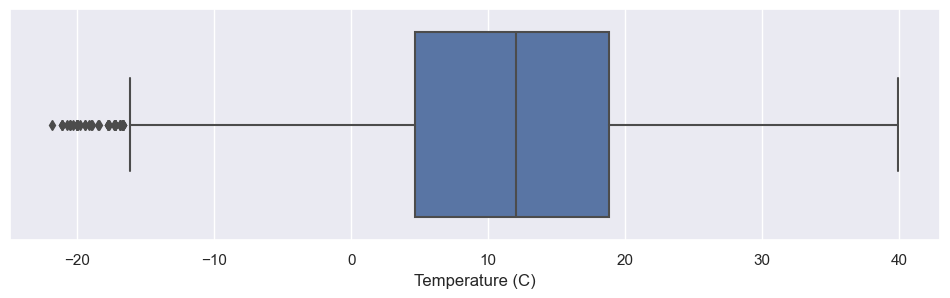

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


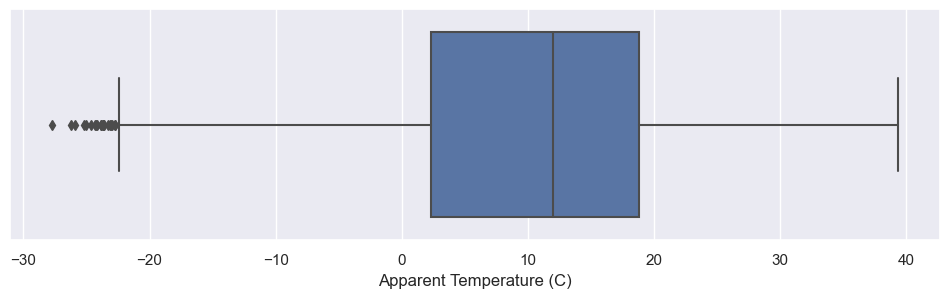

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


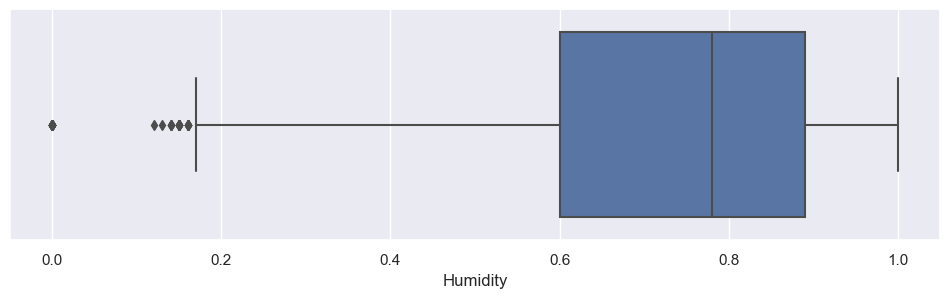

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


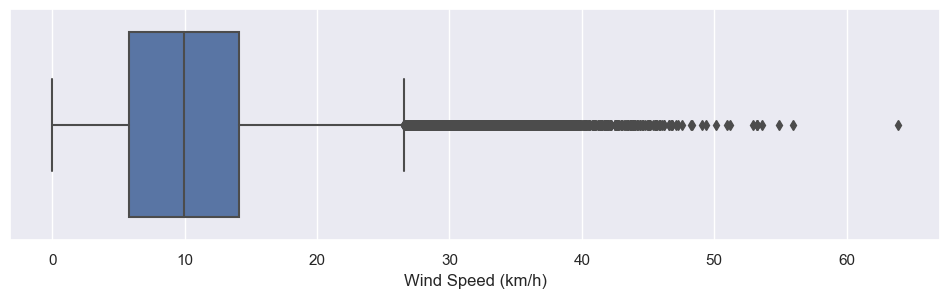

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


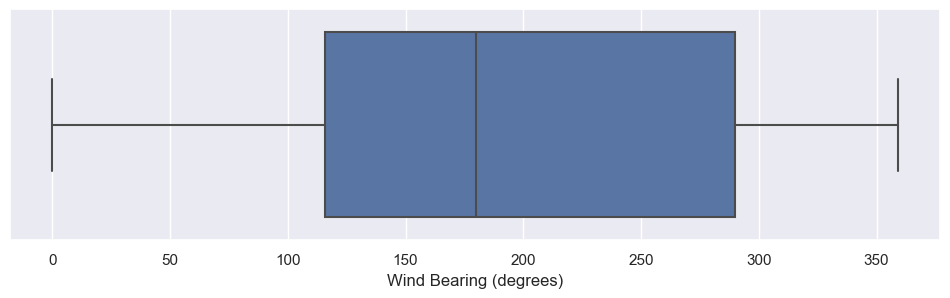

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


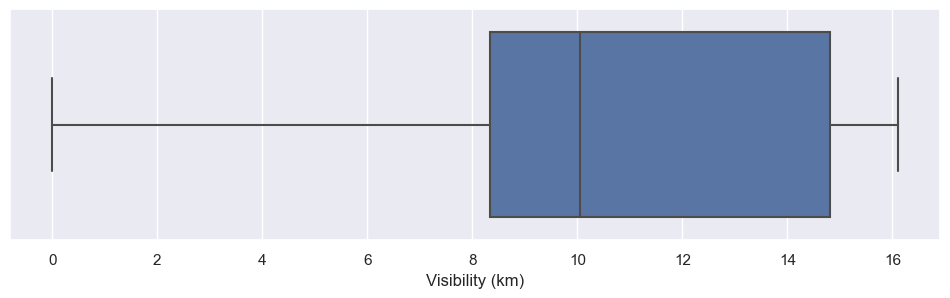

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


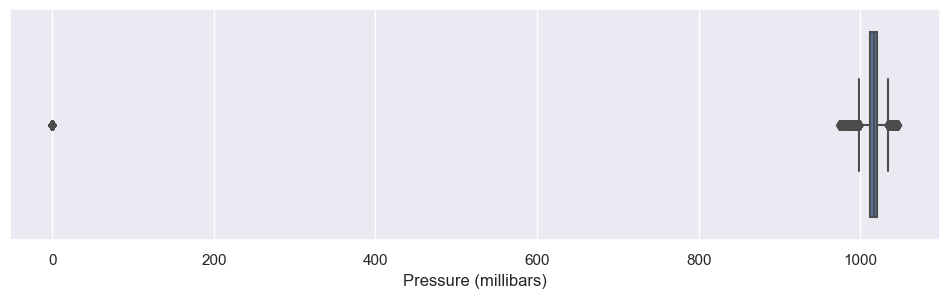

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


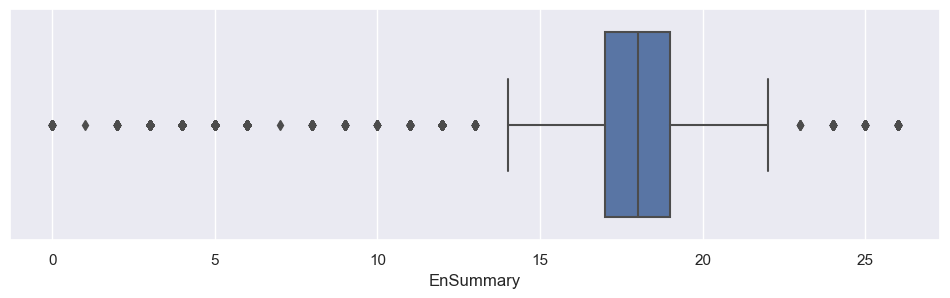

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


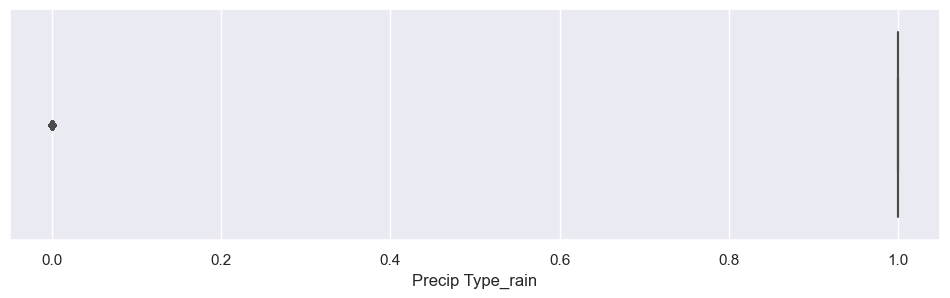

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


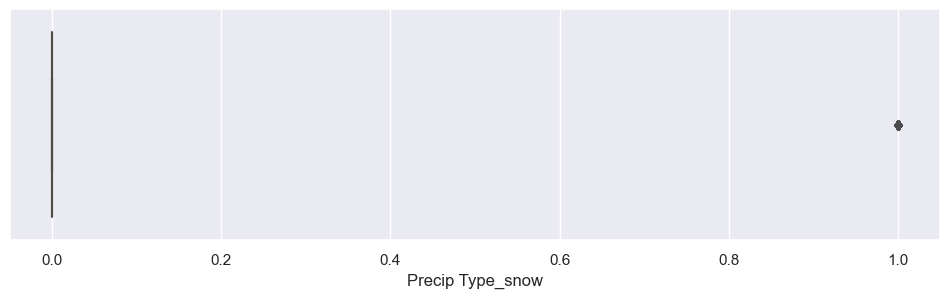

In [48]:
j = df.columns

for i in j:
    sns.set()
    plt.figure(figsize = (12, 3))
    sns.boxplot(df[i])
    plt.show()

Data standardisation

In [49]:
sct = StandardScaler()
df['Temperature (C)'] = sct.fit_transform(df[['Temperature (C)']])

In [50]:
sca = StandardScaler()
df['Apparent Temperature (C)'] = sca.fit_transform(df[['Apparent Temperature (C)']])

In [51]:
sch = StandardScaler()
df['Humidity'] = sch.fit_transform(df[['Humidity']])

In [52]:
scw = StandardScaler()
df['Wind Speed (km/h)'] = scw.fit_transform(df[['Wind Speed (km/h)']])

In [53]:
scb = StandardScaler()
df['Wind Bearing (degrees)'] = scb.fit_transform(df[['Wind Bearing (degrees)']])

In [54]:
scv = StandardScaler()
df['Visibility (km)'] = scv.fit_transform(df[['Visibility (km)']])

In [55]:
scp = StandardScaler()
df['Pressure (millibars)'] = scp.fit_transform(df[['Pressure (millibars)']])

In [57]:
print("standard deviation of dataset")
print(df.std())

standard deviation of dataset
Temperature (C)             1.000005
Apparent Temperature (C)    1.000005
Humidity                    1.000005
Wind Speed (km/h)           1.000005
Wind Bearing (degrees)      1.000005
Visibility (km)             1.000005
Pressure (millibars)        1.000005
EnSummary                   4.361497
Precip Type_rain            0.314207
Precip Type_snow            0.314207
dtype: float64


In [58]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),EnSummary,Precip Type_rain,Precip Type_snow
0,-0.257599,-0.324035,0.793470,0.478635,0.591256,1.306976,0.101685,19,1.0,0.0
1,-0.269814,-0.339097,0.639996,0.499594,0.665756,1.306976,0.105960,19,1.0,0.0
2,-0.267487,-0.138102,0.793470,-0.995473,0.153570,1.099586,0.108610,17,1.0,0.0
3,-0.381489,-0.459071,0.486521,0.476306,0.758881,1.306976,0.112628,19,1.0,0.0
4,-0.332631,-0.362469,0.486521,0.033841,0.665756,1.306976,0.113483,17,1.0,0.0


Model selection.

In [59]:
y = df['EnSummary']
x = df.drop(columns = 'EnSummary', axis = 1)

In [61]:
y.head(3)

0    19
1    19
2    17
Name: EnSummary, dtype: int32

In [62]:
x.head(3)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
0,-0.257599,-0.324035,0.793470,0.478635,0.591256,1.306976,0.101685,1.0,0.0
1,-0.269814,-0.339097,0.639996,0.499594,0.665756,1.306976,0.105960,1.0,0.0
2,-0.267487,-0.138102,0.793470,-0.995473,0.153570,1.099586,0.108610,1.0,0.0


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 5)

## Logistic Regression

In [70]:
lgr = LogisticRegression()
lgr.fit(x_train, y_train)

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
lgr_test_data_pre = lgr.predict(x_test)
lgr_test_data_acc = accuracy_score(y_test, lgr_test_data_pre)
print("Accuracy acore for test data using logistic regression ", lgr_test_data_acc)

Accuracy acore for test data using logistic regression  0.48752419131877245


## K Nearest Neighbours Classification

In [81]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn_test_data_pre = knn.predict(x_test)
#knn_test_data_acc = accuracy_score(y_test, knn_test_data_pre)
y_test

31418    17
52873     6
32723    17
2194     19
7586      6
         ..
84080    18
20154    19
2438     17
10927    17
16740    17
Name: EnSummary, Length: 28936, dtype: int32